# CONVERT RAW LABELS FOLDER TO A WBF LABEL FOLDER

## IMPORT

In [1]:
import torchvision
import numpy as np
import os
from tqdm import tqdm
from ensemble_boxes import *
import cv2
import matplotlib.pyplot as plt

## CONSTANTS

In [2]:
ROOT_DIR = '/Users/admin/Jupyter_notebooks/AI/'
RAW_LABEL = ROOT_DIR + 'raw_labels/'
WBF_LABEL = ROOT_DIR + 'wbf_labels/'
TRAIN = ROOT_DIR + '512/train/'
IOU = 0.5

if not os.path.exists(WBF_LABEL):
    os.mkdir(WBF_LABEL)
    print('WBF_LABEL folder created')

print(f'Number of raw label files to convert: {len([k for k in os.listdir(RAW_LABEL) if k.endswith(".txt")])}')

Number of raw label files to convert: 4394


## FUNCTIONS

In [44]:
def convert_yolo_to_x1y1x2y2(yolo):
    """
    Function to convert yolo format to x1y1x2y2 format
    :param yolo: [x, y, w, h]
    :type yolo: list
    :return: [x1, y1, x2, y2]
    :rtype: list
    """
    x1 = yolo[0] - yolo[2] / 2
    y1 = yolo[1] - yolo[3] / 2
    x2 = yolo[0] + yolo[2] / 2
    y2 = yolo[1] + yolo[3] / 2
    return [x1, y1, x2, y2]

In [45]:
def convert_x1y1x2y2_to_yolo(x1y1x2y2):
    """
    Function to convert x1y1x2y2 format to yolo format
    :param x1y1x2y2: [x1, y1, x2, y2]
    :type x1y1x2y2: list
    :return: [x, y, w, h]
    :rtype list
    """
    x = (x1y1x2y2[0] + x1y1x2y2[2]) / 2
    y = (x1y1x2y2[1] + x1y1x2y2[3]) / 2
    w = x1y1x2y2[2] - x1y1x2y2[0]
    h = x1y1x2y2[3] - x1y1x2y2[1]
    return [x, y, w, h]

In [46]:
def wbf(boxes, scores, labels, file):
    """
    Function to perform weighted boxes fusion
    :param boxes: boxes list
    :type boxes: list
    :param scores: scores list
    :type scores: list
    :param labels: labels list
    :type labels: list
    :param file: file name
    :type file: str
    :return: None
    """
    boxes, scores, labels = weighted_boxes_fusion([boxes], [scores], [labels], weights=None, iou_thr=IOU,
                                                  skip_box_thr=0.0001)
    for i in range(len(boxes)):
        boxes[i] = convert_x1y1x2y2_to_yolo(boxes[i])
    with open(WBF_LABEL + file, "w") as f:
        for i in range(len(boxes)):
            f.write(f'{int(labels[i])} {boxes[i][0]} {boxes[i][1]} {boxes[i][2]} {boxes[i][3]}\n')

In [47]:
def convert():
    """
    Function to convert raw labels to wbf labels
    :return: None
    """
    for file in tqdm(os.listdir(RAW_LABEL)):
        if file.endswith(".txt"):
            with open(RAW_LABEL + file, "r") as f:
                lines = f.readlines()
                boxes = []
                scores = []
                labels = []
                for line in lines:
                    line = line.split(" ")
                    boxes.append([float(line[1]), float(line[2]), float(line[3]), float(line[4])])
                    scores.append(float(1))
                    labels.append(int(line[0]))
                for i in range(len(boxes)):
                    boxes[i] = convert_yolo_to_x1y1x2y2(boxes[i])
                wbf(boxes, scores, labels, file)

In [54]:
def plot_labels(directory, nbr=5, color=(255, 0, 0)):
    """
    Function to plot labels bounding boxes on images
    :param directory: directory of labels
    :type directory: str
    :param nbr: number of images to plot
    :type nbr: int
    :param color: color of the bounding boxes
    :type color: tuple
    :return: None
    """
    for file in os.listdir(directory)[:nbr]:
        if file.endswith(".txt"):
            with open(directory + file, "r") as f:
                lines = f.readlines()
                boxes = []
                scores = []
                labels = []
                for line in lines:
                    line = line.split(" ")
                    boxes.append([float(line[1]), float(line[2]), float(line[3]), float(line[4])])
                    scores.append(float(1))
                    labels.append(int(line[0]))
                for i in range(len(boxes)):
                    boxes[i] = convert_yolo_to_x1y1x2y2(boxes[i])
                fig, ax = plt.subplots(1, 1, figsize=(16, 8))
                image = cv2.imread(TRAIN + file[:-4] + ".png")
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32)
                image /= 255.0
                width = image.shape[1]
                height = image.shape[0]
                for i in range(len(boxes)):
                    boxes[i][0] *= width
                    boxes[i][1] *= height
                    boxes[i][2] *= width
                    boxes[i][3] *= height
                    boxes[i] = [int(boxes[i][0]), int(boxes[i][1]), int(boxes[i][2]), int(boxes[i][3])]
                    cv2.rectangle(image, (boxes[i][0], boxes[i][1]), (boxes[i][2], boxes[i][3]), color, 2)
                ax.set_axis_off()
                ax.imshow(image)
                plt.show()

## CONVERSION

In [49]:
convert()

100%|██████████| 4394/4394 [00:02<00:00, 1497.26it/s]


## DISPLAY RESULTS

### BEFORE (RAW)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


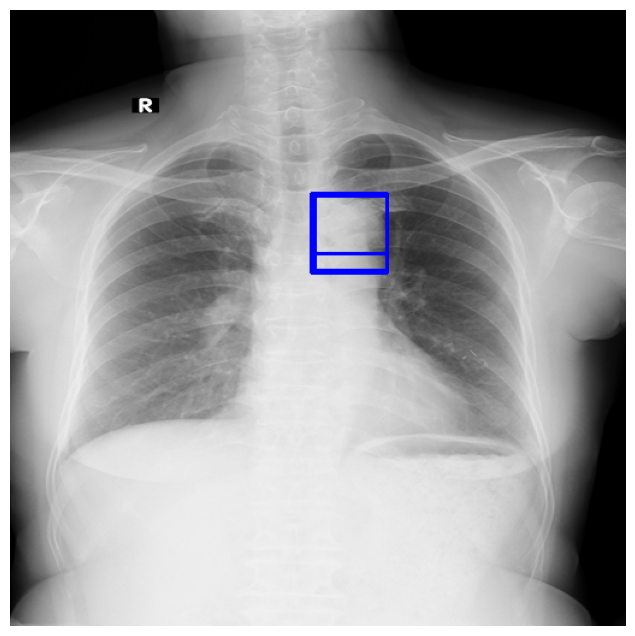

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


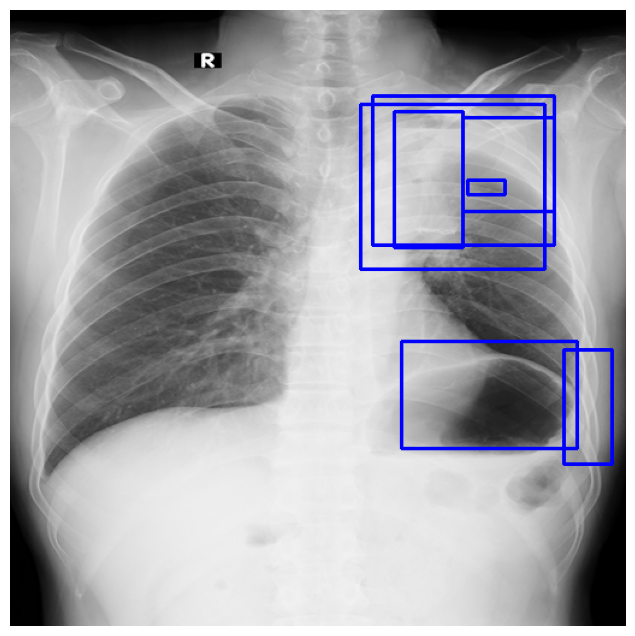

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


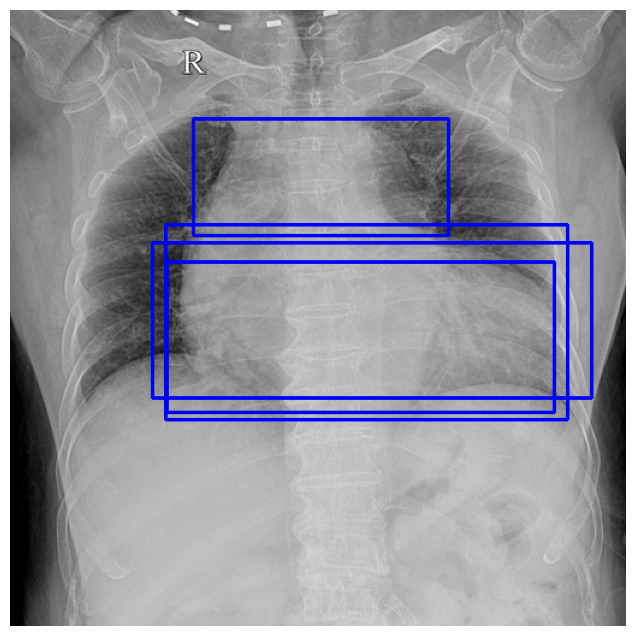

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


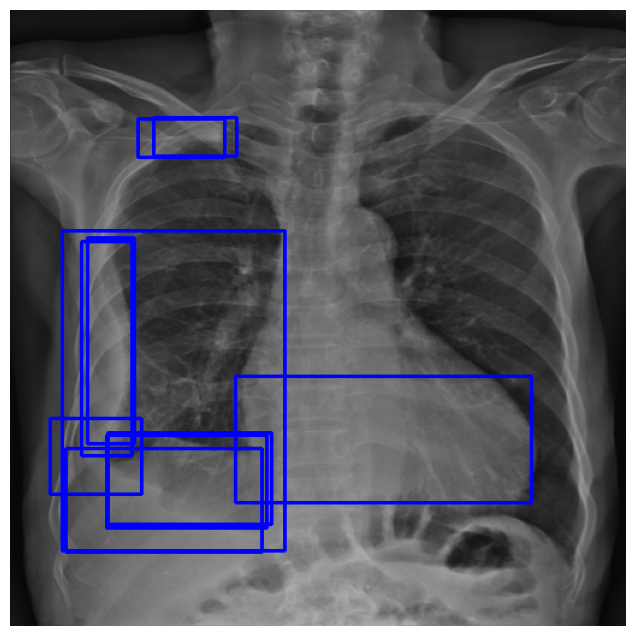

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


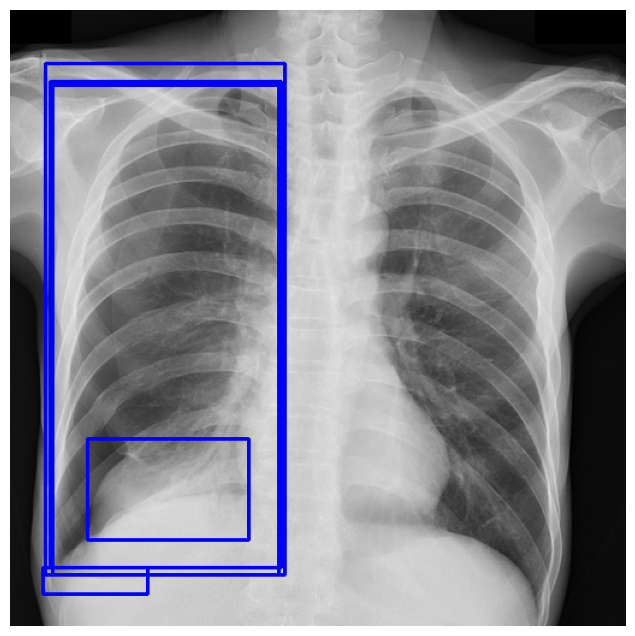

In [55]:
plot_labels(RAW_LABEL,color=(0,0,255))

### AFTER (WBF)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


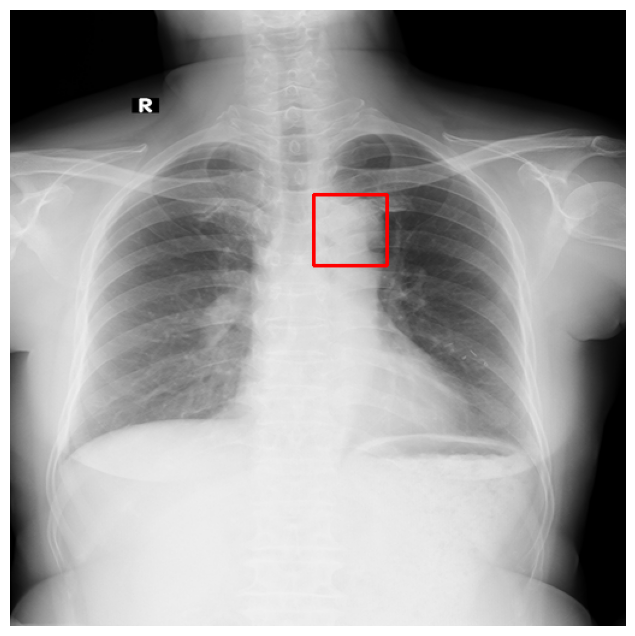

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


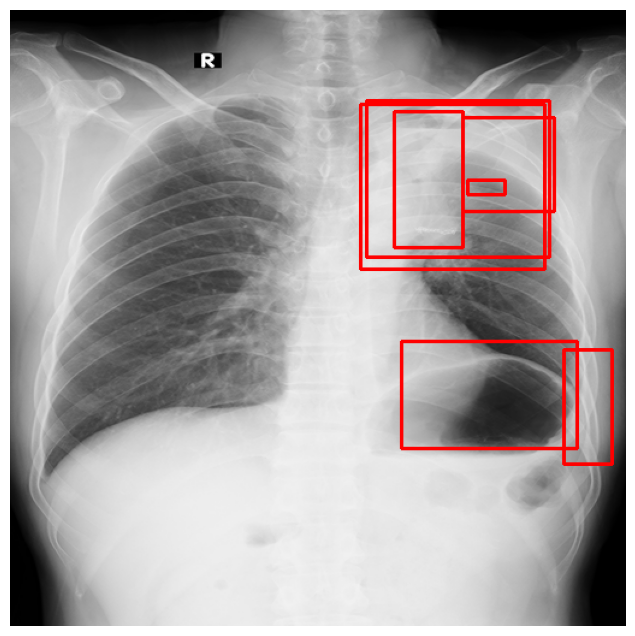

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


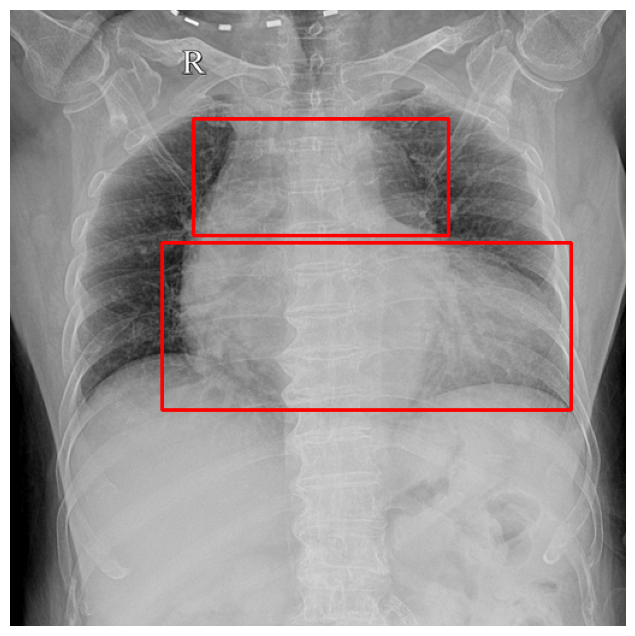

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


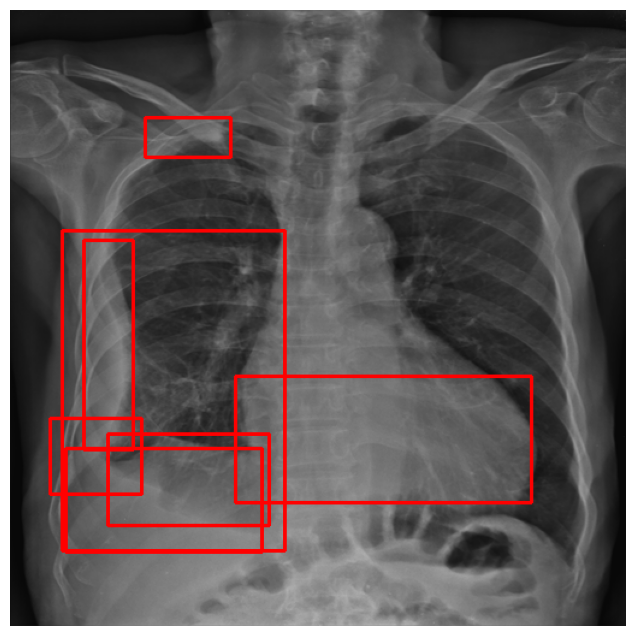

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


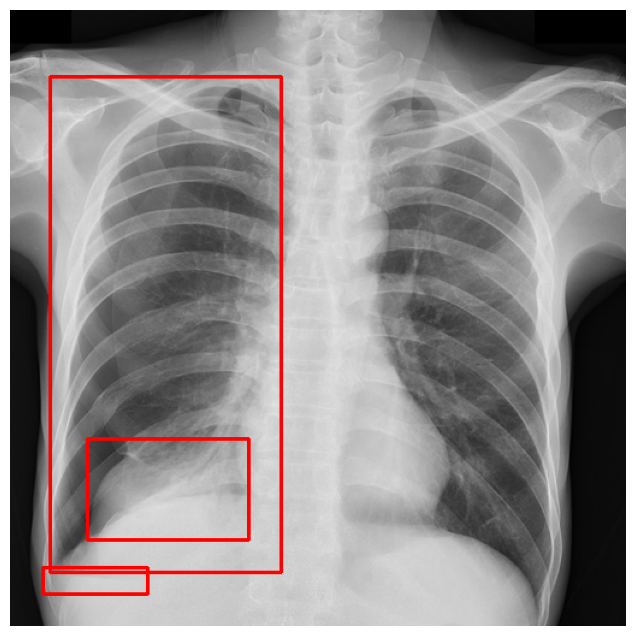

In [56]:
plot_labels(WBF_LABEL)